## Homework by MM7305

In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\lenovo\\Documents\\GitHub\\DS601_Spring21-main\\DS601_Spring21-main\\Week5\\cleaned_history_files\\cleaned_history_files\\history_cleaned-2.csv')
df.shape

(7187, 2)

In [3]:
df.head()

,domain,Time
0,www.netflix.com,5/30/2019 17:18
1,www.netflix.com,5/30/2019 17:20
2,account.microsoft.com,5/31/2019 21:56
3,www.autotrader.com,6/1/2019 18:44
4,opm.myidcare.com,6/2/2019 1:00


In [4]:
df.tail()

,domain,Time
7182,www.youtube.com,2/20/2021 12:53
7183,www.youtube.com,2/20/2021 12:53
7184,www.youtube.com,2/20/2021 12:54
7185,www.youtube.com,2/20/2021 12:54
7186,www.youtube.com,2/20/2021 12:58


In [5]:
df.dtypes

domain    object
Time      object
dtype: object

In [6]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 


3298

In [7]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [8]:
df['Time'] = pd.to_datetime(df['Time'])

In [9]:
df['domain'].value_counts()[:50]

duckduckgo.com                   435
www.bing.com                     253
www.reddit.com                   243
mail.google.com                  183
blackboard.umbc.edu              175
www.youtube.com                  175
www.google.com                   163
www.gigabyte.com                 137
github.com                       134
account.microsoft.com             80
piazza.com                        80
gamewithbutterfinger.com          69
smile.amazon.com                  64
www.netflix.com                   45
2020.internethealthreport.org     44
opm.myidcare.com                  44
localhost:8888                    38
central.bitdefender.com           37
online.citi.com                   37
www.thankyou.com                  37
www.microsoft.com                 28
imgur.com                         27
drive.google.com                  27
www.intel.com                     27
www.jstor.org                     26
www.apc.com                       26
myaccounts.capitalone.com         26
1

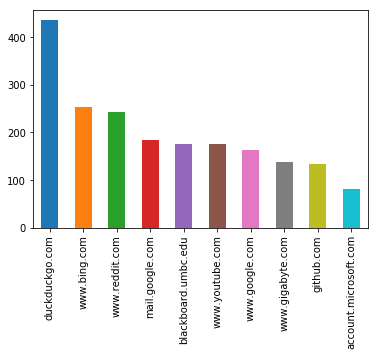

In [10]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [11]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0       9
1       1
2       4
6       3
7       1
8      19
9      34
10    122
11    147
12    257
13    182
14    148
15     62
16    254
17    335
18    565
19    756
20    618
21    273
22     70
23     29
Name: domain, dtype: int64

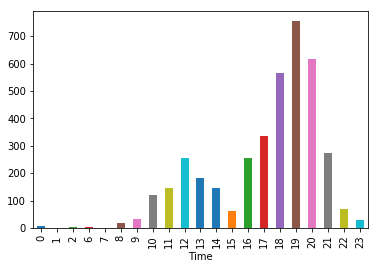

In [12]:
hourly_counts.plot.bar()

In [13]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,domain,Time,Day,DayIndex
0,www.netflix.com,2019-05-30 17:18:00,Thursday,3
1,www.netflix.com,2019-05-30 17:20:00,Thursday,3
2,account.microsoft.com,2019-05-31 21:56:00,Friday,4
3,www.autotrader.com,2019-06-01 18:44:00,Saturday,5
4,opm.myidcare.com,2019-06-02 01:00:00,Sunday,6


In [14]:
df['Day'].value_counts()

Wednesday    1174
Thursday      643
Sunday        622
Tuesday       429
Saturday      386
Friday        372
Monday        263
Name: Day, dtype: int64

In [15]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0     263
1     429
2    1174
3     643
4     372
5     386
6     622
Name: DayIndex, dtype: int64

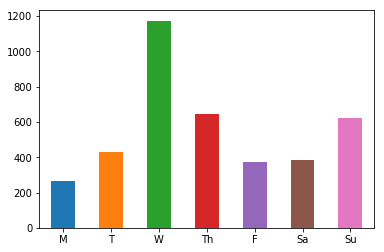

In [16]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [17]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,domain,Time,Day,DayIndex,isWeekend
0,www.netflix.com,2019-05-30 17:18:00,Thursday,3,False
1,www.netflix.com,2019-05-30 17:20:00,Thursday,3,False
2,account.microsoft.com,2019-05-31 21:56:00,Friday,4,False
3,www.autotrader.com,2019-06-01 18:44:00,Saturday,5,True
4,opm.myidcare.com,2019-06-02 01:00:00,Sunday,6,True


In [18]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [19]:
weekend.head()

,domain,Time,Day,DayIndex,isWeekend
3,www.autotrader.com,2019-06-01 18:44:00,Saturday,5,True
4,opm.myidcare.com,2019-06-02 01:00:00,Sunday,6,True
5,downdetector.com,2019-06-02 15:21:00,Sunday,6,True
6,downdetector.com,2019-06-02 15:45:00,Sunday,6,True
8,account.microsoft.com,2019-06-09 14:32:00,Sunday,6,True


In [20]:
weekday['domain'].value_counts()[:5]

duckduckgo.com         343
www.reddit.com         243
www.bing.com           232
blackboard.umbc.edu    151
mail.google.com        150
Name: domain, dtype: int64

In [21]:
weekend['domain'].value_counts()[:5]

duckduckgo.com      92
www.google.com      91
www.youtube.com     54
www.gigabyte.com    52
github.com          48
Name: domain, dtype: int64

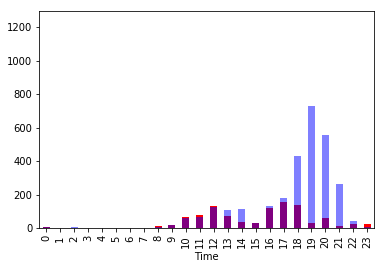

In [22]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 1300])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)


In [23]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

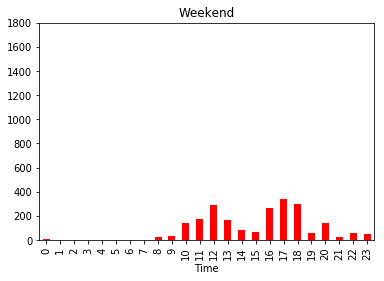

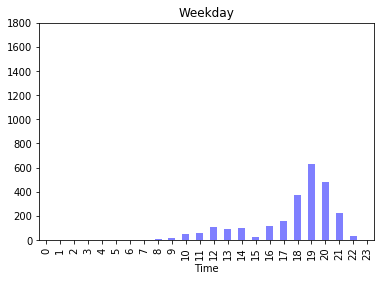

In [24]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [32]:
df['domain'].value_counts()[:50]

duckduckgo.com                   435
www.bing.com                     253
www.reddit.com                   243
mail.google.com                  183
blackboard.umbc.edu              175
www.youtube.com                  175
www.google.com                   163
www.gigabyte.com                 137
github.com                       134
account.microsoft.com             80
piazza.com                        80
gamewithbutterfinger.com          69
smile.amazon.com                  64
www.netflix.com                   45
2020.internethealthreport.org     44
opm.myidcare.com                  44
localhost:8888                    38
central.bitdefender.com           37
online.citi.com                   37
www.thankyou.com                  37
www.microsoft.com                 28
imgur.com                         27
drive.google.com                  27
www.intel.com                     27
www.jstor.org                     26
www.apc.com                       26
myaccounts.capitalone.com         26
1

In [26]:
df['domain'] = df['domain'].astype(str)

In [27]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

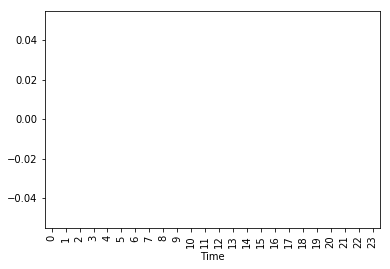

In [28]:
_= show_domain_stats('facebook', 'blue')

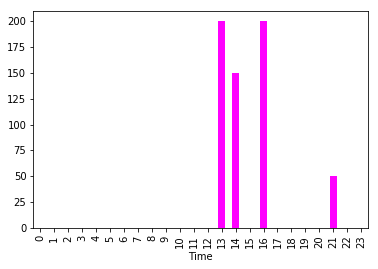

In [29]:
_ = show_domain_stats('stackover', 'magenta')


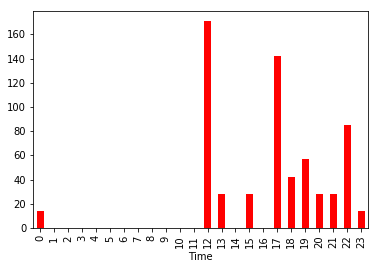

In [30]:
_ = show_domain_stats('netflix', 'red')


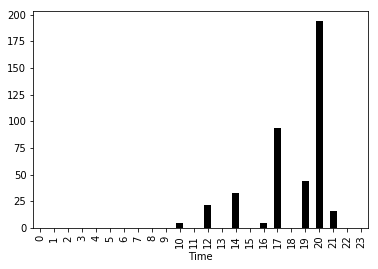

In [31]:
_=show_domain_stats('amazon', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
##### Personal computer.
1. Is s/he employed?
##### This person is probably employed  
1. What are his/her interests?
##### this person has varied interest from Cybersecurity, cryptocurrency, TechGadgets, Books
1. List any interesting findings
##### This person is not active in social media via laptop. 
##### spends more time at night watching netflix,HBOMax vedio streaming platform. 
##### This individual probably might have account at Citi bank
##### This person is techhardware savy probably a gamer? 


answer here